**Exercise 1**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display_image(title, image):
    plt.figure(figsize=(4,4))
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

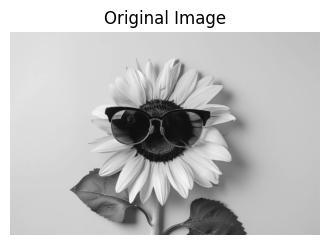

In [3]:
image = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)
display_image('Original Image', image)

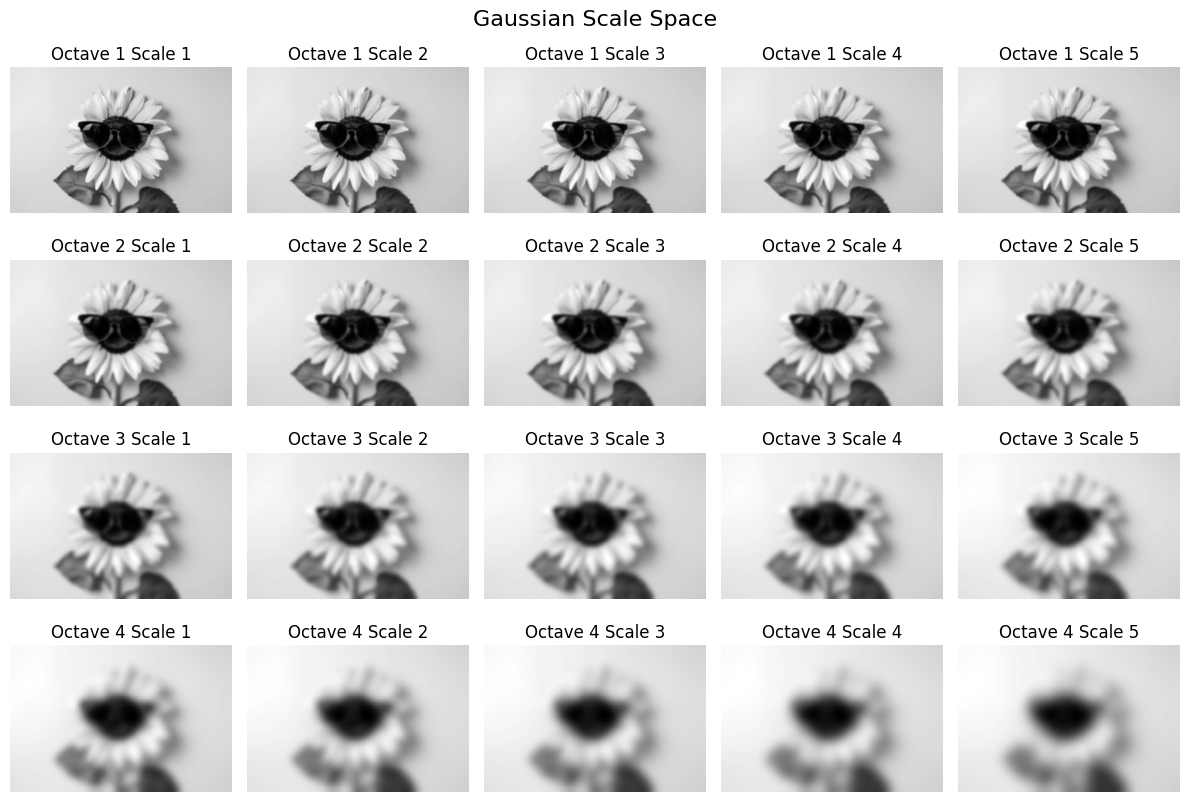

In [4]:
def display_scale_space(image, num_octaves=4, num_scales=5):
    gaussian_pyramid = []
    current_image = image.copy()
    for octave in range(num_octaves):
        octave_images = []
        for scale in range(num_scales):
            sigma = 1.6 * (2 ** (scale / num_scales))
            blurred = cv2.GaussianBlur(current_image, (0, 0), sigmaX=sigma, sigmaY=sigma)
            octave_images.append(blurred)
        gaussian_pyramid.append(octave_images)
        current_image = cv2.pyrDown(current_image)
    return gaussian_pyramid
gaussian_pyramid = display_scale_space(image)

plt.figure(figsize=(12, 8))
for octave in range(len(gaussian_pyramid)):
    for scale in range(len(gaussian_pyramid[octave])):
        plt.subplot(len(gaussian_pyramid), len(gaussian_pyramid[octave]), octave * len(gaussian_pyramid[octave]) + scale + 1)
        plt.imshow(gaussian_pyramid[octave][scale], cmap='gray')
        plt.title(f"Octave {octave+1} Scale {scale+1}")
        plt.axis('off')
plt.tight_layout()
plt.suptitle("Gaussian Scale Space", fontsize=16, y=1.02)
plt.show()

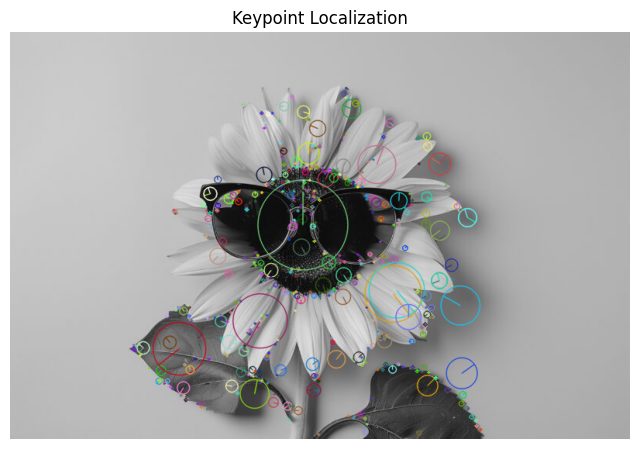

In [5]:
sift = cv2.SIFT_create()

keypoints = sift.detect(image, None)
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title("Keypoint Localization")
plt.axis('off')
plt.show()

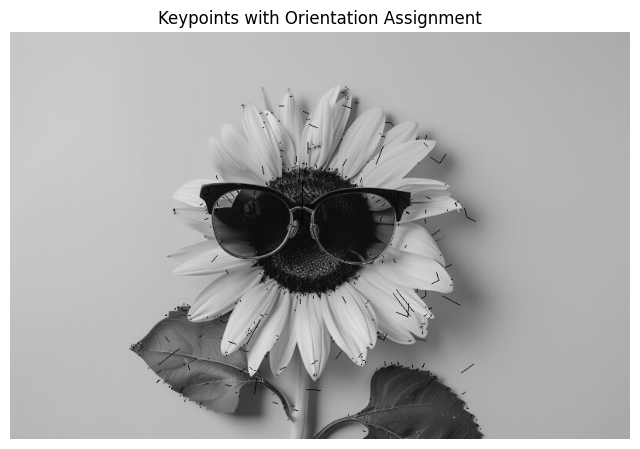

In [6]:
def draw_keypoints_with_orientation(image, keypoints):
    image_with_orientations = image.copy()
    for kp in keypoints:
        angle = kp.angle
        x, y = kp.pt
        length = kp.size * 0.5
        end_x = int(x + length * np.cos(np.deg2rad(angle)))
        end_y = int(y + length * np.sin(np.deg2rad(angle)))
        cv2.line(image_with_orientations, (int(x), int(y)), (end_x, end_y), (0, 255, 0), 1)
    return image_with_orientations
image_with_orientations = draw_keypoints_with_orientation(image, keypoints)
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image_with_orientations, cv2.COLOR_BGR2RGB))
plt.title("Keypoints with Orientation Assignment")
plt.axis('off')
plt.show()

In [7]:
keypoints, descriptors = sift.compute(image, keypoints)
print(f"Number of keypoints detected: {len(keypoints)}")
print(f"Descriptor size: {descriptors.shape}")
print("Sample descriptor (first keypoint):")
print(descriptors[0])

Number of keypoints detected: 509
Descriptor size: (509, 128)
Sample descriptor (first keypoint):
[  3.  15. 161. 119.   0.   0.   0.   0.  83. 136.  90.  14.   0.   0.
   0.   0.  47.  29.   1.   0.   0.   0.   0.   1.   1.   0.   0.   1.
   1.   1.   1.   1.  47.  37. 113.  66.   1.   0.   1.   3. 181.  71.
  18.   2.   0.   0.   0.  12. 125.   8.   0.   0.   0.   0.   0.  12.
   2.   2.   1.   2.   3.   1.   0.   1.  72.  23.   6.  22.  14.   1.
   2.   6. 181.  37.   1.   1.   0.   0.   0.   3. 131.   6.   0.   0.
   0.   0.   0.   6.   1.   1.   0.   0.   3.   3.   1.   2.  68.  15.
   3.  35.  16.   3.   3.   2. 181.  54.   1.   1.   0.   0.   0.   1.
 104.  18.   0.   0.   0.   0.   0.   0.   1.   3.   1.   1.   1.   0.
   0.   0.]


**Exercise 2**

In [13]:
import cv2
import numpy as np
model_config = 'yolov3.cfg'
model_weights = 'yolov3.weights'
coco_names = 'coco.names'

In [14]:
net = cv2.dnn.readNetFromDarknet(model_config, model_weights)
with open(coco_names, 'r') as f:
    classes = f.read().strip().split('\n')
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [23]:
image = cv2.imread('image2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width = image.shape[:2]
blob = cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False)
net.setInput(blob)

In [24]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
detections = net.forward(output_layers)

conf_threshold = 0.5 
nms_threshold = 0.4  
boxes, confidences, class_ids = [], [], []

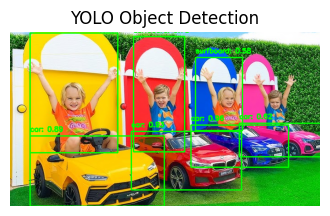

In [27]:
for output in detections:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > conf_threshold:
            center_x, center_y, w, h = (detection[0:4] * np.array([width, height, width, height])).astype('int')
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, int(w), int(h)])
            confidences.append(float(confidence))
            class_ids.append(class_id)
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

if len(indices) > 0:
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
        color = (0, 255, 0)
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
display_image('YOLO Object Detection', image)